In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
import json
import re

In [3]:
import lxml

Note: in order to make it better/smoother for Github, I've commented out some of the large containers. Obviously if you download and run the notebook yourself, you can turn these lines back into code and run/see them...

# WhoScored

**Initial Scraper**

In [4]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import pandas as pd
from pandas import json_normalize
import json
#include your local path to the Chrome webdriver
chrome_driver_path = r"C:\Users\Al Raven\anaconda3\Lib\site-packages\selenium\webdriver\chrome\chromedriver.exe"

In [5]:
#scraping code inspired by Varun Vasudevan (@TheDevilsDNA)
driver = webdriver.Chrome()
df1 = pd.DataFrame()
links = ['https://www.whoscored.com/Matches/1775737/Live/Europe-Europa-League-2023-2024-Marseille-Ajax']

wait = WebDriverWait(driver, 20)  # Increase time if needed

for i in links:    
    driver.get(i)
    
    # Close ad or accept cookies (replace with the actual element)
    try:
        close_button = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="some-button-id"]')))
        close_button.click()
    except:
        pass
    
    # Wait for the overlay to disappear (if it does so automatically)
    wait.until(EC.invisibility_of_element((By.ID, 'qc-cmp2-ui')))
    
    match_centre = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="sub-navigation"]/ul/li[4]/a')))
    match_centre.click()
    
    element = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="layout-wrapper"]/script[1]')))
    match_centre = driver.find_element("xpath",'//*[@id="sub-navigation"]/ul/li[4]/a')
    match_centre.click()
    element = driver.find_element("xpath",'//*[@id="layout-wrapper"]/script[1]')
    script_content = element.get_attribute('innerHTML')
    script_ls = script_content.split(sep="  ")
    script_ls = list(filter(None, script_ls))
    script_ls = [name for name in script_ls if name.strip()]
    dictstring = script_ls[2][17:-2]
    content = json.loads(dictstring)
    match = json_normalize(content['events'],sep='_')
    hometeam = content['home']['name']
    awayteam = content['away']['name']
    homeid = content['home']['teamId']
    awayid = content['away']['teamId']
    players = pd.DataFrame()
    homepl = json_normalize(content['home']['players'],sep='_')[['name', 'position', 'shirtNo', 'playerId']]
    awaypl = json_normalize(content['away']['players'],sep='_')[['name', 'position', 'shirtNo', 'playerId']]
    players = pd.concat([homepl,awaypl])
    match = match.merge(players, how='left')
    df1 = pd.concat([df1, match])
    #match_id += 1
    driver.close()

In [6]:
df1.type_displayName.unique()

array(['Start', 'Pass', 'BlockedPass', 'Dispossessed', 'Tackle',
       'BallRecovery', 'Clearance', 'SavedShot', 'Save', 'CornerAwarded',
       'BallTouch', 'Interception', 'Aerial', 'TakeOn', 'Foul', 'Goal',
       'PenaltyFaced', 'Challenge', 'MissedShots', 'OffsideGiven',
       'OffsidePass', 'OffsideProvoked', 'KeeperPickup', 'Smother', 'End',
       'SubstitutionOff', 'SubstitutionOn', 'Claim', 'ShieldBallOpp',
       'Card', 'KeeperSweeper', 'FormationChange', 'Error',
       'FormationSet'], dtype=object)

**General Match & Team Info**

In [7]:
#dictionary with player Ids and names - both teams
content['playerIdNameDictionary']

{'125378': 'Joaquín Correa',
 '362788': 'Leonardo Balerdi',
 '326646': 'Renan Lodi',
 '91978': 'Geoffrey Kondogbia',
 '104368': 'Chancel Mbemba',
 '234376': 'Samuel Gigot',
 '301869': 'Jonathan Clauss',
 '101017': 'Jordan Veretout',
 '422240': 'Bilal Nadir',
 '470696': 'Emran Soglo',
 '44120': 'Pierre-Emerick Aubameyang',
 '322668': 'Amine Harit',
 '392361': 'Azzedine Ounahi',
 '280972': 'Amir Murillo',
 '366116': 'Iliman Ndiaye',
 '322670': 'Ismaïla Sarr',
 '145427': 'Pau López',
 '120335': 'Rubén Blanco',
 '471062': 'François Mughe',
 '407949': 'Vítinha',
 '422662': 'Bamo Meïté',
 '125375': 'Gerónimo Rulli',
 '460297': 'Benjamin Tahirovic',
 '270829': 'Borna Sosa',
 '381530': 'Jakov Medic',
 '484494': 'Anton Gaaei',
 '389020': 'Georges Mikautadze',
 '424248': 'Kristian Hlynsson',
 '400165': 'Devyne Rensch',
 '467715': 'Jorrel Hato',
 '401122': 'Kenneth Taylor',
 '89794': 'Steven Berghuis',
 '279425': 'Steven Bergwijn',
 '437387': 'Anass Salah-Eddine',
 '423955': 'Charlie Setford',
 '

In [8]:
#Note: the home team was Marseille
#I think most of the lines/data below are self-explanatory, so I didn't add descriptions every time...
content['home']['teamId']

249

In [9]:
content['home']['managerName']

'Gennaro Gattuso'

In [10]:
content['home']['scores']

{'halftime': 2, 'fulltime': 4, 'running': 4}

In [11]:
content['home']['field']

'home'

In [12]:
content['home']['averageAge']

26.0

In [13]:
content['referee']

{'officialId': 3777,
 'firstName': 'Simone',
 'lastName': 'Sozza',
 'hasParticipatedMatches': False,
 'name': 'Simone Sozza'}

In [14]:
#this is a detailed container about Marseille's formations/setups during the game!
content['home']['formations']

[{'formationId': 2,
  'formationName': '442',
  'captainPlayerId': 234376,
  'period': 16,
  'startMinuteExpanded': 0,
  'endMinuteExpanded': 67,
  'jerseyNumbers': [16,
   7,
   12,
   19,
   4,
   99,
   23,
   27,
   11,
   10,
   20,
   5,
   8,
   9,
   18,
   24,
   29,
   34,
   36,
   37,
   62],
  'formationSlots': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'playerIds': [145427,
   301869,
   326646,
   91978,
   234376,
   104368,
   322670,
   101017,
   322668,
   44120,
   125378,
   362788,
   392361,
   407949,
   422662,
   471062,
   366116,
   422240,
   120335,
   470696,
   280972],
  'formationPositions': [{'vertical': 0.0, 'horizontal': 5.0},
   {'vertical': 2.5, 'horizontal': 1.0},
   {'vertical': 2.5, 'horizontal': 9.0},
   {'vertical': 6.0, 'horizontal': 3.5},
   {'vertical': 2.5, 'horizontal': 3.5},
   {'vertical': 2.5, 'horizontal': 6.5},
   {'vertical': 6.0, 'horizontal': 1

**Player Stats**

In [15]:
#exploring Samuel Gigot's (i.e. Marseille's fourth player) individual stats
content['home']['players'][3]['stats']

{'possession': {'3': 2.0,
  '4': 2.0,
  '10': 1.0,
  '14': 1.0,
  '17': 3.0,
  '20': 2.0,
  '21': 3.0,
  '25': 1.0,
  '30': 2.0,
  '32': 1.0,
  '34': 1.0,
  '36': 1.0,
  '38': 2.0,
  '41': 2.0,
  '42': 2.0,
  '44': 1.0,
  '47': 2.0,
  '50': 1.0,
  '54': 1.0,
  '56': 1.0,
  '57': 1.0,
  '59': 1.0,
  '60': 1.0,
  '65': 1.0,
  '67': 1.0,
  '68': 3.0,
  '71': 1.0,
  '72': 3.0,
  '75': 1.0,
  '76': 3.0,
  '82': 1.0,
  '83': 1.0,
  '84': 2.0,
  '85': 1.0,
  '88': 1.0,
  '90': 1.0,
  '91': 1.0,
  '96': 1.0},
 'ratings': {'0': 6.0,
  '1': 6.28,
  '3': 6.29,
  '4': 6.3,
  '8': 6.36,
  '9': 6.16,
  '10': 6.15,
  '14': 6.16,
  '16': 6.19,
  '17': 6.2,
  '20': 6.2,
  '21': 6.19,
  '23': 6.18,
  '24': 6.21,
  '25': 6.28,
  '29': 6.13,
  '30': 6.12,
  '32': 6.12,
  '34': 6.2,
  '36': 6.21,
  '38': 6.2,
  '41': 6.24,
  '42': 6.24,
  '44': 6.24,
  '47': 6.25,
  '48': 6.32,
  '50': 6.33,
  '54': 6.35,
  '56': 6.36,
  '57': 6.36,
  '59': 6.36,
  '60': 6.36,
  '65': 6.36,
  '67': 6.37,
  '68': 6.37,
  '7

In [16]:
content['home']['players'][3]['stats']['shotsTotal']

{'1': 1.0}

In [17]:
content['home']['players'][3]['stats']['shotsBlocked']

{'1': 1.0}

In [18]:
content['home']['players'][3]['stats']['touches']

{'1': 2.0,
 '3': 2.0,
 '4': 2.0,
 '10': 1.0,
 '14': 1.0,
 '16': 1.0,
 '17': 3.0,
 '20': 2.0,
 '21': 3.0,
 '24': 1.0,
 '25': 1.0,
 '29': 1.0,
 '30': 2.0,
 '32': 1.0,
 '34': 1.0,
 '36': 1.0,
 '38': 2.0,
 '41': 3.0,
 '42': 2.0,
 '44': 1.0,
 '47': 2.0,
 '50': 1.0,
 '54': 1.0,
 '56': 1.0,
 '57': 1.0,
 '59': 1.0,
 '60': 1.0,
 '65': 1.0,
 '67': 1.0,
 '68': 3.0,
 '71': 1.0,
 '72': 3.0,
 '75': 1.0,
 '76': 3.0,
 '82': 1.0,
 '83': 1.0,
 '84': 2.0,
 '85': 1.0,
 '88': 1.0,
 '90': 1.0,
 '91': 1.0,
 '96': 1.0,
 '97': 3.0}

In [19]:
#content['home']['players'][3]['stats']['possession']
#content['home']['players'][3]['stats']['shotsTotal']
#content['home']['players'][3]['stats']['shotsBlocked']
#content['home']['players'][3]['stats']['touches']
content['home']['players'][3]['stats']['passesTotal']
#content['home']['players'][3]['stats']['passesAccurate']
#content['home']['players'][3]['stats']['passSuccess']
#content['home']['players'][3]['stats']['aerialsTotal']
#content['home']['players'][3]['stats']['aerialsWon']
#content['home']['players'][3]['stats']['offensiveAerials']
#content['home']['players'][3]['stats']['defensiveAerials']
#content['home']['players'][3]['stats']['foulsCommited']
#content['home']['players'][3]['stats']['tacklesTotal']
#content['home']['players'][3]['stats']['tacklesSuccessful']
#content['home']['players'][3]['stats']['tackleSuccess']

{'3': 2.0,
 '4': 2.0,
 '14': 1.0,
 '17': 3.0,
 '20': 2.0,
 '21': 3.0,
 '25': 1.0,
 '30': 2.0,
 '32': 1.0,
 '34': 1.0,
 '36': 1.0,
 '38': 2.0,
 '41': 2.0,
 '42': 2.0,
 '44': 1.0,
 '47': 2.0,
 '50': 1.0,
 '54': 1.0,
 '56': 1.0,
 '59': 1.0,
 '60': 1.0,
 '65': 1.0,
 '67': 1.0,
 '68': 3.0,
 '71': 1.0,
 '72': 3.0,
 '75': 1.0,
 '76': 3.0,
 '82': 1.0,
 '84': 2.0,
 '88': 1.0,
 '90': 1.0,
 '91': 1.0,
 '10': 1.0,
 '57': 1.0,
 '83': 1.0,
 '85': 1.0,
 '96': 1.0}

In [20]:
Gigot_passes = pd.json_normalize(content['home']['players'][3]['stats']['passesTotal'])
Gigot_passes.T.sum()

0    57.0
dtype: float64

**Team Stats**

In [21]:
content['home']['stats']['ratings']

{'0': 6.03727272727273,
 '1': 6.09272727272727,
 '2': 6.12545454545455,
 '3': 6.12454545454545,
 '4': 6.13454545454545,
 '5': 6.16454545454545,
 '6': 6.21181818181818,
 '8': 6.36636363636364,
 '9': 6.25363636363636,
 '10': 6.25181818181818,
 '11': 6.24727272727273,
 '12': 6.26454545454545,
 '13': 6.29090909090909,
 '14': 6.29181818181818,
 '15': 6.30363636363636,
 '16': 6.30636363636364,
 '17': 6.31454545454545,
 '18': 6.31090909090909,
 '19': 6.31363636363636,
 '20': 6.31454545454545,
 '21': 6.33272727272727,
 '22': 6.32909090909091,
 '23': 6.32454545454546,
 '24': 6.32818181818182,
 '25': 6.58818181818182,
 '27': 6.58818181818182,
 '28': 6.59636363636364,
 '29': 6.45181818181818,
 '30': 6.45181818181818,
 '31': 6.45181818181818,
 '32': 6.46545454545454,
 '33': 6.47090909090909,
 '34': 6.47909090909091,
 '35': 6.49272727272727,
 '36': 6.49363636363636,
 '38': 6.49454545454545,
 '39': 6.50090909090909,
 '40': 6.51818181818182,
 '41': 6.52272727272727,
 '42': 6.52454545454545,
 '43': 6.

In [22]:
content['home']['stats']['shotsTotal']

{'0': 1.0,
 '1': 1.0,
 '5': 2.0,
 '8': 1.0,
 '15': 1.0,
 '25': 1.0,
 '28': 1.0,
 '43': 1.0,
 '48': 1.0,
 '56': 1.0,
 '65': 1.0,
 '66': 1.0,
 '69': 1.0,
 '89': 2.0,
 '94': 1.0,
 '97': 1.0,
 '98': 1.0}

In [23]:
total_shots = pd.json_normalize(content['home']['stats']['shotsTotal'])
total_shots.T.sum()

0    19.0
dtype: float64

In [24]:
SOT = pd.json_normalize(content['home']['stats']['shotsOnTarget'])
missed_shots = pd.json_normalize(content['home']['stats']['shotsOffTarget'])
blocked_shots = pd.json_normalize(content['home']['stats']['shotsBlocked'])

In [25]:
SOT.T.sum()

0    10.0
dtype: float64

In [26]:
missed_shots.T.sum()

0    5.0
dtype: float64

In [27]:
blocked_shots.T.sum()

0    4.0
dtype: float64

In [28]:
clearances = pd.json_normalize(content['home']['stats']['clearances'])
clearances.T.sum()

0    8.0
dtype: float64

In [29]:
interceptions = pd.json_normalize(content['home']['stats']['interceptions'])
interceptions.T.sum()

0    6.0
dtype: float64

In [30]:
possession = pd.json_normalize(content['home']['stats']['possession'])
possession.T

,0
0,7.0
1,2.0
3,6.0
4,12.0
5,2.0
...,...
96,1.0
97,2.0
98,8.0
99,2.0


In [31]:
touches = content['home']['stats']['touches']
touches

{'0': 11.0,
 '1': 7.0,
 '2': 4.0,
 '3': 8.0,
 '4': 12.0,
 '5': 4.0,
 '6': 4.0,
 '8': 1.0,
 '9': 2.0,
 '10': 8.0,
 '11': 5.0,
 '12': 9.0,
 '13': 8.0,
 '14': 10.0,
 '15': 7.0,
 '16': 1.0,
 '17': 17.0,
 '19': 1.0,
 '20': 10.0,
 '21': 17.0,
 '22': 7.0,
 '23': 2.0,
 '24': 6.0,
 '25': 8.0,
 '27': 4.0,
 '28': 5.0,
 '29': 1.0,
 '30': 9.0,
 '31': 9.0,
 '32': 12.0,
 '33': 14.0,
 '34': 3.0,
 '35': 6.0,
 '36': 10.0,
 '37': 1.0,
 '38': 11.0,
 '39': 3.0,
 '40': 4.0,
 '41': 10.0,
 '42': 11.0,
 '43': 4.0,
 '44': 9.0,
 '45': 8.0,
 '47': 9.0,
 '48': 8.0,
 '50': 5.0,
 '51': 1.0,
 '52': 7.0,
 '53': 3.0,
 '54': 4.0,
 '55': 1.0,
 '56': 15.0,
 '57': 6.0,
 '58': 5.0,
 '59': 6.0,
 '60': 2.0,
 '61': 3.0,
 '62': 4.0,
 '65': 9.0,
 '66': 6.0,
 '67': 1.0,
 '68': 22.0,
 '69': 8.0,
 '70': 1.0,
 '71': 9.0,
 '72': 10.0,
 '73': 24.0,
 '74': 3.0,
 '75': 11.0,
 '76': 23.0,
 '77': 7.0,
 '79': 8.0,
 '80': 2.0,
 '82': 11.0,
 '83': 3.0,
 '84': 10.0,
 '85': 4.0,
 '87': 3.0,
 '88': 3.0,
 '89': 16.0,
 '90': 12.0,
 '91': 3.0,
 '9

In [32]:
h_total_touches = pd.json_normalize(touches)
h_total_touches = h_total_touches.T.sum()
h_total_touches

0    615.0
dtype: float64

In [33]:
a_touches = pd.json_normalize(content['away']['stats']['touches'])
a_total_touches = a_touches.T.sum()

In [34]:
a_total_touches

0    647.0
dtype: float64

In [35]:
h_possession = h_total_touches*100/(h_total_touches+a_total_touches)
h_possession

0    48.732171
dtype: float64

In [36]:
a_possession =a_total_touches*100/(a_total_touches+h_total_touches)
a_possession

0    51.267829
dtype: float64

In [37]:
h_accurate_passes = pd.json_normalize(content['home']['stats']['passesAccurate'])
h_accurate_passes = h_accurate_passes.T.sum()

In [38]:
h_total_passes = pd.json_normalize(content['home']['stats']['passesTotal'])
h_total_passes = h_total_passes.T.sum()

In [39]:
h_pass_success_rate = h_accurate_passes*100/h_total_passes
h_pass_success_rate

0    87.746171
dtype: float64

In [40]:
key_passes = pd.json_normalize(content['home']['stats']['passesKey'])
key_passes.T.sum()

0    13.0
dtype: float64

In [41]:
pass_successRate = pd.json_normalize(content['home']['stats']['passSuccess'])
pass_successRate.T

,0
0,85.71
3,83.33
4,91.67
6,100.00
10,57.14
...,...
39,0.00
53,0.00
96,0.00
97,0.00


In [42]:
#content['home']['stats']['aerialsTotal']
#content['home']['stats']['aerialsWon']
#content['home']['stats']['aerialSuccess']
#content['home']['stats']['offensiveAerials']
#content['home']['stats']['defensiveAerials']
#content['home']['stats']['cornersTotal']
#content['home']['stats']['cornersAccurate']
#content['home']['stats']['throwInsTotal']
#content['home']['stats']['throwInsAccurate']
#content['home']['stats']['throwInAccuracy']
#content['home']['stats']['offsidesCaught']
#content['home']['stats']['foulsCommited']
#content['home']['stats']['tackleSuccessful']
#content['home']['stats']['tacklesTotal']
#content['home']['stats']['tackleUnsuccesful']
#content['home']['stats']['tackleSuccess']
#content['home']['stats']['dribbledPast']
#content['home']['stats']['dribblesWon']
#content['home']['stats']['dribblesAttempted']
#content['home']['stats']['dribblesLost']
#content['home']['stats']['dribbleSuccess']
#content['home']['stats']['dispossessed']

In [43]:
df_possession = pd.DataFrame([h_possession,a_possession])
df_possession.columns = ['Possession%']
df_possession.index = ['Marseille','Ajax']
df_possession.round(1)

,Possession%
Marseille,48.7
Ajax,51.3


In [44]:
keyPasses = key_passes.T.sum()
shotsOT = SOT.T.sum()
shots = total_shots.T.sum()

In [45]:
marseille_stats = pd.DataFrame([h_total_touches,h_possession,keyPasses,shots,shotsOT])
marseille_stats.columns=['Marseille']
marseille_stats.index=['Touches','Possession%','Key Passes','Shots','SOT']
marseille_stats.round(1)

,Marseille
Touches,615.0
Possession%,48.7
Key Passes,13.0
Shots,19.0
SOT,10.0


**Match Timeline/Events & Incidents**

In [46]:
events = pd.json_normalize(content['home']['incidentEvents'])
events

,id,eventId,minute,second,teamId,playerId,x,y,expandedMinute,qualifiers,...,type.value,type.displayName,outcomeType.value,outcomeType.displayName,endX,endY,relatedEventId,relatedPlayerId,cardType.value,cardType.displayName
0,2.623069e+09,69,8,11,249,44120.0,88.5,50.0,8,"[{'type': {'value': 214, 'displayName': 'BigCh...",...,16,Goal,1,Successful,NaN,NaN,NaN,NaN,NaN,NaN
1,2.623070e+09,70,9,21,249,301869.0,24.5,60.9,9,"[{'type': {'value': 285, 'displayName': 'Defen...",...,7,Tackle,1,Successful,NaN,NaN,NaN,NaN,NaN,NaN
2,2.623081e+09,217,25,44,249,301869.0,99.6,0.9,25,"[{'type': {'value': 6, 'displayName': 'CornerT...",...,1,Pass,1,Successful,91.3,48.5,NaN,NaN,NaN,NaN
3,2.623081e+09,218,25,46,249,104368.0,93.2,48.1,25,"[{'type': {'value': 29, 'displayName': 'Assist...",...,16,Goal,1,Successful,NaN,NaN,217.0,301869.0,NaN,NaN
4,2.623097e+09,412,46,50,249,322668.0,96.9,26.9,48,"[{'type': {'value': 141, 'displayName': 'PassE...",...,1,Pass,1,Successful,92.0,54.6,NaN,NaN,NaN,NaN
5,2.623097e+09,413,46,53,249,44120.0,92.6,56.5,48,"[{'type': {'value': 56, 'displayName': 'Zone'}...",...,16,Goal,1,Successful,NaN,NaN,412.0,322668.0,NaN,NaN
6,2.623108e+09,520,65,38,249,125378.0,0.0,0.0,67,"[{'type': {'value': 59, 'displayName': 'Jersey...",...,18,SubstitutionOff,1,Successful,NaN,NaN,521.0,366116.0,NaN,NaN
7,2.623108e+09,521,65,38,249,366116.0,0.0,0.0,67,"[{'type': {'value': 44, 'displayName': 'Player...",...,19,SubstitutionOn,1,Successful,NaN,NaN,520.0,125378.0,NaN,NaN
8,2.623109e+09,558,68,4,249,326646.0,0.0,0.0,70,"[{'type': {'value': 55, 'displayName': 'Relate...",...,17,Card,1,Successful,NaN,NaN,557.0,326646.0,31.0,Yellow
9,2.623119e+09,713,86,15,249,101017.0,0.0,0.0,88,"[{'type': {'value': 55, 'displayName': 'Relate...",...,18,SubstitutionOff,1,Successful,NaN,NaN,714.0,407949.0,NaN,NaN


**Shot Zones**  
*This is info/data on where shots taken ended up: either missed or on target and where relative to the goal*

In [47]:
content['home']['shotZones']

{'missHighLeft': {'stats': {}},
 'missHighCentre': {'stats': {'98': {'goalCount': 0, 'count': 1}}},
 'missHighRight': {'stats': {}},
 'missLeft': {'stats': {'15': {'goalCount': 0, 'count': 1},
   '66': {'goalCount': 0, 'count': 1}}},
 'missRight': {'stats': {'69': {'goalCount': 0, 'count': 1}}},
 'postLeft': {'stats': {}},
 'postCentre': {'stats': {}},
 'postRight': {'stats': {}},
 'onTargetHighLeft': {'stats': {'25': {'goalCount': 1, 'count': 1}}},
 'onTargetHighCentre': {'stats': {'0': {'goalCount': 0, 'count': 1}}},
 'onTargetHighRight': {'stats': {'89': {'goalCount': 0, 'count': 1}}},
 'onTargetLowLeft': {'stats': {'65': {'goalCount': 0, 'count': 1},
   '89': {'goalCount': 0, 'count': 1}}},
 'onTargetLowCentre': {'stats': {'1': {'goalCount': 0, 'count': 1},
   '43': {'goalCount': 0, 'count': 1},
   '48': {'goalCount': 1, 'count': 1},
   '56': {'goalCount': 0, 'count': 1}}},
 'onTargetLowRight': {'stats': {'5': {'goalCount': 0, 'count': 2},
   '8': {'goalCount': 1, 'count': 1},
   '

In [48]:
#the same can be done with the away team, of course...

**Extracting Event Data**

In [49]:
#selecting all passes
df_passes = df1.loc[df1['type_displayName']=='Pass']
df_passes

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
2,2.623064e+09,3,0,0.0,249,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
3,2.623064e+09,4,0,1.0,249,49.3,54.3,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amine Harit,FW,11.0
4,2.623064e+09,5,0,2.0,249,39.3,46.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 35, 37, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoffrey Kondogbia,MC,19.0
5,2.623064e+09,6,0,5.0,249,32.0,61.1,0,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 117, 30, 35, 37, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chancel Mbemba,DC,99.0
6,2.623064e+09,7,0,7.0,249,34.5,90.0,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renan Lodi,DL,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2.623124e+09,793,96,55.0,249,15.8,57.5,98,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 118, 120, 124, 128, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pau López,GK,16.0
1466,2.623124e+09,794,96,59.0,249,36.9,51.8,98,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoffrey Kondogbia,MC,19.0
1467,2.623124e+09,795,97,3.0,249,10.7,44.2,99,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 117, 124, 127, 36, 38, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pau López,GK,16.0
1468,2.623124e+09,796,97,7.0,249,43.1,4.0,99,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jonathan Clauss,DR,7.0


In [50]:
#selecting all touches
df_touches = df1.loc[df1['isTouch']==True]
df_touches

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
2,2.623064e+09,3,0,0.0,249,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
3,2.623064e+09,4,0,1.0,249,49.3,54.3,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amine Harit,FW,11.0
4,2.623064e+09,5,0,2.0,249,39.3,46.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 35, 37, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoffrey Kondogbia,MC,19.0
5,2.623064e+09,6,0,5.0,249,32.0,61.1,0,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 117, 30, 35, 37, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chancel Mbemba,DC,99.0
6,2.623064e+09,7,0,7.0,249,34.5,90.0,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renan Lodi,DL,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,2.623124e+09,795,97,3.0,249,10.7,44.2,99,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 117, 124, 127, 36, 38, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pau López,GK,16.0
1468,2.623124e+09,796,97,7.0,249,43.1,4.0,99,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jonathan Clauss,DR,7.0
1469,2.623124e+09,797,97,12.0,249,53.3,4.5,99,"[{'type': {'value': 13, 'displayName': 'Foul'}...","[91, 63]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ismaïla Sarr,MR,23.0
1472,2.623125e+09,798,98,8.0,249,58.2,11.3,100,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 120, 29, 124, 133, 36, 37, 217, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jonathan Clauss,DR,7.0


In [51]:
#selecting all shots ('isShot' column)
df_shots = df1.loc[df1['isShot']==True]
df_shots

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
24,2.623065e+09,16,0,41.0,249,92.2,36.1,0,"[{'type': {'value': 154, 'displayName': 'Inten...","[91, 9, 10, 1, 3, 12]",...,35.9,26.6,48.8,True,NaN,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
38,2.623065e+09,24,1,18.0,249,94.4,53.0,1,"[{'type': {'value': 55, 'displayName': 'Relate...","[91, 10, 140, 0, 3, 11, 14]",...,52.5,19.0,50.5,True,NaN,NaN,NaN,Samuel Gigot,DC,4.0
112,2.623067e+09,57,5,1.0,249,88.1,26.2,5,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 9, 10, 1, 3, 13]",...,44.9,3.2,46.1,True,NaN,NaN,NaN,Ismaïla Sarr,MR,23.0
117,2.623068e+09,61,5,36.0,249,90.6,63.3,5,"[{'type': {'value': 20, 'displayName': 'RightF...","[91, 10, 1, 5, 11, 12]",...,58.1,19.0,45.2,True,NaN,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
145,2.623069e+09,69,8,11.0,249,88.5,50.0,8,"[{'type': {'value': 214, 'displayName': 'BigCh...","[91, 22, 9, 10, 202, 1, 12, 17, 25]",...,NaN,0.6,48.2,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
157,2.623070e+09,101,9,28.0,130,96.3,57.0,9,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 24, 9, 10, 202, 0, 3, 13, 16, 19, 26]",...,NaN,5.7,54.0,True,True,NaN,NaN,Brian Brobbey,FW,9.0
237,2.623073e+09,155,13,35.0,130,89.5,42.3,13,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 9, 10, 201, 1, 3, 12]",...,44.6,3.8,48.5,True,NaN,NaN,NaN,Brian Brobbey,FW,9.0
269,2.623074e+09,130,15,49.0,249,93.5,63.2,15,"[{'type': {'value': 103, 'displayName': 'GoalM...","[91, 7, 90, 10, 1, 3, 13]",...,NaN,27.8,64.4,True,NaN,NaN,NaN,Ismaïla Sarr,MR,23.0
446,2.623081e+09,218,25,46.0,249,93.2,48.1,25,"[{'type': {'value': 29, 'displayName': 'Assist...","[91, 24, 9, 10, 202, 1, 5, 14, 17, 21, 27]",...,NaN,24.7,54.0,True,True,NaN,NaN,Chancel Mbemba,DC,99.0
464,2.623083e+09,232,28,30.0,249,80.0,12.0,28,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 7, 10, 2, 3, 12]",...,NaN,52.8,62.7,True,NaN,NaN,NaN,Amine Harit,FW,11.0


In [52]:
#selecting all goals
df_goals = df1.loc[df1['type_displayName']=='Goal']
df_goals

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
145,2.623069e+09,69,8,11.0,249,88.5,50.0,8,"[{'type': {'value': 214, 'displayName': 'BigCh...","[91, 22, 9, 10, 202, 1, 12, 17, 25]",...,NaN,0.6,48.2,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
157,2.623070e+09,101,9,28.0,130,96.3,57.0,9,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 24, 9, 10, 202, 0, 3, 13, 16, 19, 26]",...,NaN,5.7,54.0,True,True,NaN,NaN,Brian Brobbey,FW,9.0
446,2.623081e+09,218,25,46.0,249,93.2,48.1,25,"[{'type': {'value': 29, 'displayName': 'Assist...","[91, 24, 9, 10, 202, 1, 5, 14, 17, 21, 27]",...,NaN,24.7,54.0,True,True,NaN,NaN,Chancel Mbemba,DC,99.0
474,2.623083e+09,287,29,14.0,130,90.9,49.8,29,"[{'type': {'value': 72, 'displayName': 'LeftFo...","[91, 24, 9, 10, 202, 1, 3, 13, 17, 19, 26]",...,NaN,11.4,53.9,True,True,NaN,NaN,Brian Brobbey,FW,9.0
779,2.623097e+09,413,46,53.0,249,92.6,56.5,48,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 24, 9, 10, 1, 3, 12, 17, 19, 25]",...,NaN,9.5,48.3,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
1250,2.623115e+09,718,78,56.0,130,95.2,56.2,80,"[{'type': {'value': 15, 'displayName': 'Head'}...","[91, 24, 9, 10, 202, 0, 3, 14, 16, 19, 27]",...,NaN,8.9,53.6,True,True,NaN,NaN,Chuba Akpom,Sub,10.0
1419,2.623122e+09,767,92,21.0,249,88.5,50.0,94,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 22, 9, 10, 202, 1, 12, 17, 25]",...,NaN,1.9,47.7,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0


In [53]:
df_tackles = df1.loc[df1.type_displayName=='Tackle']
#This is for tackles, but the 
#same can be done for other defensive actions: 'Challenge','BallRecovery','BlockedPass','Interception','Foul'...

#And we can select for one team specifically
df_tackles.loc[df_tackles.teamId==130]

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
10,2.623064e+09,3,0,12.0,130,44.3,4.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benjamin Tahirovic,DMC,33.0
90,2.623067e+09,60,3,55.0,130,37.8,64.5,3,"[{'type': {'value': 233, 'displayName': 'Oppos...","[91, 142]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Devyne Rensch,DC,2.0
226,2.623073e+09,145,13,9.0,130,10.3,91.1,13,"[{'type': {'value': 233, 'displayName': 'Oppos...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Borna Sosa,DL,25.0
793,2.623098e+09,468,48,55.0,130,41.5,78.3,50,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 142]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benjamin Tahirovic,DMC,33.0
819,2.623099e+09,496,50,13.0,130,86.3,2.7,52,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 142]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kristian Hlynsson,Sub,38.0
860,2.623101e+09,518,53,0.0,130,50.5,92.1,55,"[{'type': {'value': 233, 'displayName': 'Oppos...","[91, 142]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Borna Sosa,DL,25.0
896,2.623102e+09,533,55,7.0,130,38.5,10.5,57,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benjamin Tahirovic,DMC,33.0
1128,2.623111e+09,654,71,45.0,130,18.0,40.0,73,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 142]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anton Gaaei,DR,3.0
1195,2.623113e+09,680,74,56.0,130,22.2,73.2,76,"[{'type': {'value': 233, 'displayName': 'Oppos...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jorrel Hato,DC,4.0
1386,2.623120e+09,793,88,18.0,130,56.7,17.7,90,"[{'type': {'value': 285, 'displayName': 'Defen...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kristian Hlynsson,Sub,38.0


In [54]:
#selecting all defensive actions: 
df_defensive_actions = df1.loc[(df1.type_displayName=='Challenge') | (df1.type_displayName=='BallRecovery')| 
        (df1.type_displayName=='BlockedPass')|
        (df1.type_displayName=='Tackle')|
        (df1.type_displayName=='Interception')|
        (df1.type_displayName=='Foul')]
df_defensive_actions

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
8,2.623066e+09,49,0,9.0,130,53.8,8.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 60]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anton Gaaei,DR,3.0
10,2.623064e+09,3,0,12.0,130,44.3,4.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benjamin Tahirovic,DMC,33.0
11,2.623064e+09,4,0,13.0,130,45.1,7.8,0,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anton Gaaei,DR,3.0
21,2.623065e+09,13,0,36.0,249,58.1,62.2,0,"[{'type': {'value': 233, 'displayName': 'Oppos...","[91, 143]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jordan Veretout,MC,27.0
22,2.623065e+09,14,0,37.0,249,63.6,50.5,0,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amine Harit,FW,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,2.623124e+09,776,95,8.0,249,24.8,63.6,97,"[{'type': {'value': 242, 'displayName': 'Obstr...","[91, 63]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samuel Gigot,DC,4.0
1445,2.623124e+09,823,95,8.0,130,75.2,36.4,97,"[{'type': {'value': 56, 'displayName': 'Zone'}...",[64],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kristian Hlynsson,Sub,38.0
1460,2.623124e+09,788,96,40.0,249,24.6,80.1,98,[],[93],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amir Murillo,Sub,62.0
1469,2.623124e+09,797,97,12.0,249,53.3,4.5,99,"[{'type': {'value': 13, 'displayName': 'Foul'}...","[91, 63]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ismaïla Sarr,MR,23.0


In [55]:
#This is an example of how you can use the original data - in this case 
#passes - to narrow down/select more specific metrics, i.e. focusing on 
#one team, looking at actions (here passes) in certain specific zones 
#of the pitch, and so on...

#selecting Marseille's passes only (teamId=249)
h_passes = df_passes[df_passes['teamId']==249]
#Marseille passes IN opponent's half
h_opphalf_passes = h_passes[h_passes['x']>=50]
#Marseille's passes in their own half
h_ownhalf_passes = h_passes[h_passes['x']<50]
#Marseille passes INTO the final third
h_final_3rd_passes = h_passes[h_passes['endX']>=66]
h_final_3rd_passes = h_final_3rd_passes[h_final_3rd_passes['x']<=66]
#Marseille's completed passes into the final third
h_comp_final3rd_passes = h_final_3rd_passes[h_final_3rd_passes['outcomeType_displayName']=='Successful']
#Marseille's passes into the opponent's box
h_passes_intobox = h_passes[h_passes['endX']>=85]
h_passes_intobox = h_passes_intobox[h_passes_intobox['endY']<=80]
h_passes_intobox = h_passes_intobox[h_passes_intobox['endY']>=20]
#Marseille's COMPLETED/SUCCESSFUL passes into the opponent's box
h_comp_passes_intobox = h_passes_intobox[h_passes_intobox['outcomeType_displayName']=='Successful']
#Same pass dataframes for Ajax
a_passes = df_passes[df_passes['teamId']==130]
a_opphalf_passes = a_passes[a_passes['x']>=50]
a_ownhalf_passes = a_passes[a_passes['x']<50]
a_final_3rd_passes = a_passes[a_passes['endX']>=66]
a_final_3rd_passes = a_final_3rd_passes[a_final_3rd_passes['x']<=66]
a_comp_final3rd_passes = a_final_3rd_passes[a_final_3rd_passes['outcomeType_displayName']=='Successful']
a_passes_intobox = a_passes[a_passes['endX']>=85]
a_passes_intobox = a_passes_intobox[a_passes_intobox['endY']<=80]
a_passes_intobox = a_passes_intobox[a_passes_intobox['endY']>=20]
a_comp_passes_intobox = a_passes_intobox[a_passes_intobox['outcomeType_displayName']=='Successful']

In [56]:
#For example, here are the away team's completed/successful passes into the 
#opponent's box
a_comp_passes_intobox

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
156,2.623070e+09,100,9,25.0,130,81.6,49.8,9,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 92, 100, 119, 117, 30, 123, 129, 203, 205...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steven Berghuis,AMC,23.0
236,2.623073e+09,154,13,34.0,130,77.2,32.9,13,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 119, 117, 30, 123, 129, 203, 205, 40, 43,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carlos Forbs,AMR,11.0
473,2.623083e+09,286,29,11.0,130,80.2,29.9,29,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 92, 100, 119, 117, 30, 123, 203, 205, 40,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steven Berghuis,AMC,23.0
831,2.623099e+09,497,50,51.0,130,99.6,0.8,52,"[{'type': {'value': 72, 'displayName': 'LeftFo...","[91, 119, 138, 124, 125, 31, 32, 34, 35, 37, 2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steven Berghuis,AMC,23.0
850,2.623100e+09,513,52,13.0,130,99.5,0.5,54,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 119, 117, 30, 205, 31, 32, 34, 35, 37, 21...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steven Berghuis,AMC,23.0
914,2.623133e+09,841,56,21.0,130,70.7,19.8,58,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 119, 123, 138, 124, 125, 39, 41, 44, 36, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steven Berghuis,AMC,23.0
1247,2.623115e+09,717,78,55.0,130,87.2,21.8,80,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 92, 100, 119, 123, 137, 124, 125, 203, 40...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kristian Hlynsson,Sub,38.0


In [57]:
#Marseille's shots and goals
home_shots = df_shots[df_shots['teamId'] == 249]
home_goals = home_shots[home_shots['isGoal']==True]

#Ajax's shots
away_shots = df_shots[df_shots['teamId'] == 130]
away_goals = away_shots[away_shots['isGoal']==True]

In [58]:
home_shots

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
24,2.623065e+09,16,0,41.0,249,92.2,36.1,0,"[{'type': {'value': 154, 'displayName': 'Inten...","[91, 9, 10, 1, 3, 12]",...,35.9,26.6,48.8,True,NaN,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
38,2.623065e+09,24,1,18.0,249,94.4,53.0,1,"[{'type': {'value': 55, 'displayName': 'Relate...","[91, 10, 140, 0, 3, 11, 14]",...,52.5,19.0,50.5,True,NaN,NaN,NaN,Samuel Gigot,DC,4.0
112,2.623067e+09,57,5,1.0,249,88.1,26.2,5,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 9, 10, 1, 3, 13]",...,44.9,3.2,46.1,True,NaN,NaN,NaN,Ismaïla Sarr,MR,23.0
117,2.623068e+09,61,5,36.0,249,90.6,63.3,5,"[{'type': {'value': 20, 'displayName': 'RightF...","[91, 10, 1, 5, 11, 12]",...,58.1,19.0,45.2,True,NaN,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
145,2.623069e+09,69,8,11.0,249,88.5,50.0,8,"[{'type': {'value': 214, 'displayName': 'BigCh...","[91, 22, 9, 10, 202, 1, 12, 17, 25]",...,NaN,0.6,48.2,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
269,2.623074e+09,130,15,49.0,249,93.5,63.2,15,"[{'type': {'value': 103, 'displayName': 'GoalM...","[91, 7, 90, 10, 1, 3, 13]",...,NaN,27.8,64.4,True,NaN,NaN,NaN,Ismaïla Sarr,MR,23.0
446,2.623081e+09,218,25,46.0,249,93.2,48.1,25,"[{'type': {'value': 29, 'displayName': 'Assist...","[91, 24, 9, 10, 202, 1, 5, 14, 17, 21, 27]",...,NaN,24.7,54.0,True,True,NaN,NaN,Chancel Mbemba,DC,99.0
464,2.623083e+09,232,28,30.0,249,80.0,12.0,28,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 7, 10, 2, 3, 12]",...,NaN,52.8,62.7,True,NaN,NaN,NaN,Amine Harit,FW,11.0
689,2.623093e+09,364,43,52.0,249,71.0,30.8,43,"[{'type': {'value': 146, 'displayName': 'Block...","[91, 10, 2, 3, 11, 12]",...,32.8,19.0,51.8,True,NaN,NaN,NaN,Jonathan Clauss,DR,7.0
779,2.623097e+09,413,46,53.0,249,92.6,56.5,48,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 24, 9, 10, 1, 3, 12, 17, 19, 25]",...,NaN,9.5,48.3,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0


In [59]:
home_goals

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
145,2.623069e+09,69,8,11.0,249,88.5,50.0,8,"[{'type': {'value': 214, 'displayName': 'BigCh...","[91, 22, 9, 10, 202, 1, 12, 17, 25]",...,NaN,0.6,48.2,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
446,2.623081e+09,218,25,46.0,249,93.2,48.1,25,"[{'type': {'value': 29, 'displayName': 'Assist...","[91, 24, 9, 10, 202, 1, 5, 14, 17, 21, 27]",...,NaN,24.7,54.0,True,True,NaN,NaN,Chancel Mbemba,DC,99.0
779,2.623097e+09,413,46,53.0,249,92.6,56.5,48,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 24, 9, 10, 1, 3, 12, 17, 19, 25]",...,NaN,9.5,48.3,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
1419,2.623122e+09,767,92,21.0,249,88.5,50.0,94,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 22, 9, 10, 202, 1, 12, 17, 25]",...,NaN,1.9,47.7,True,True,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0


In [60]:
away_shots

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
157,2.623070e+09,101,9,28.0,130,96.3,57.0,9,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 24, 9, 10, 202, 0, 3, 13, 16, 19, 26]",...,NaN,5.7,54.0,True,True,NaN,NaN,Brian Brobbey,FW,9.0
237,2.623073e+09,155,13,35.0,130,89.5,42.3,13,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 9, 10, 201, 1, 3, 12]",...,44.6,3.8,48.5,True,NaN,NaN,NaN,Brian Brobbey,FW,9.0
474,2.623083e+09,287,29,14.0,130,90.9,49.8,29,"[{'type': {'value': 72, 'displayName': 'LeftFo...","[91, 24, 9, 10, 202, 1, 3, 13, 17, 19, 26]",...,NaN,11.4,53.9,True,True,NaN,NaN,Brian Brobbey,FW,9.0
619,2.623090e+09,362,39,40.0,130,69.0,27.6,39,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 10, 2, 3, 11, 12]",...,31.4,19.0,48.1,True,NaN,NaN,NaN,Anton Gaaei,DR,3.0
917,2.623103e+09,548,56,23.0,130,95.1,63.1,58,"[{'type': {'value': 15, 'displayName': 'Head'}...","[91, 9, 10, 0, 5, 14]",...,53.3,20.3,48.5,True,NaN,NaN,NaN,Jorrel Hato,DC,4.0
972,2.623104e+09,586,59,29.0,130,91.5,37.9,61,"[{'type': {'value': 147, 'displayName': 'Block...","[91, 9, 10, 1, 3, 12]",...,45.3,14.6,46.6,True,NaN,NaN,NaN,Steven Bergwijn,AML,7.0
1250,2.623115e+09,718,78,56.0,130,95.2,56.2,80,"[{'type': {'value': 15, 'displayName': 'Head'}...","[91, 24, 9, 10, 202, 0, 3, 14, 16, 19, 27]",...,NaN,8.9,53.6,True,True,NaN,NaN,Chuba Akpom,Sub,10.0


In [61]:
away_goals

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
157,2.623070e+09,101,9,28.0,130,96.3,57.0,9,"[{'type': {'value': 22, 'displayName': 'Regula...","[91, 24, 9, 10, 202, 0, 3, 13, 16, 19, 26]",...,NaN,5.7,54.0,True,True,NaN,NaN,Brian Brobbey,FW,9.0
474,2.623083e+09,287,29,14.0,130,90.9,49.8,29,"[{'type': {'value': 72, 'displayName': 'LeftFo...","[91, 24, 9, 10, 202, 1, 3, 13, 17, 19, 26]",...,NaN,11.4,53.9,True,True,NaN,NaN,Brian Brobbey,FW,9.0
1250,2.623115e+09,718,78,56.0,130,95.2,56.2,80,"[{'type': {'value': 15, 'displayName': 'Head'}...","[91, 24, 9, 10, 202, 0, 3, 14, 16, 19, 27]",...,NaN,8.9,53.6,True,True,NaN,NaN,Chuba Akpom,Sub,10.0


**Heatmaps**  
There are heatmaps on WhoScored match pages/reports, but here I'm building heatmaps based on the event data we extracted.

In [62]:
import mplsoccer

In [63]:
from mplsoccer import Pitch

In [64]:
import seaborn as sns

In [65]:
import matplotlib.pyplot as plt

In [66]:
#h_passes
#home_shots
h_defensive_actions = df_defensive_actions[df_defensive_actions['teamId']==249]
h_touches = df_touches[df_touches['teamId']==249]
h_touches

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType_value,cardType_displayName,name,position,shirtNo
2,2.623064e+09,3,0,0.0,249,50.0,50.0,0,"[{'type': {'value': 140, 'displayName': 'PassE...","[91, 117, 30, 35, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pierre-Emerick Aubameyang,FW,10.0
3,2.623064e+09,4,0,1.0,249,49.3,54.3,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amine Harit,FW,11.0
4,2.623064e+09,5,0,2.0,249,39.3,46.4,0,"[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 117, 30, 35, 37, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoffrey Kondogbia,MC,19.0
5,2.623064e+09,6,0,5.0,249,32.0,61.1,0,"[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 117, 30, 35, 37, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chancel Mbemba,DC,99.0
6,2.623064e+09,7,0,7.0,249,34.5,90.0,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renan Lodi,DL,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,2.623124e+09,794,96,59.0,249,36.9,51.8,98,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 35, 38, 215, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Geoffrey Kondogbia,MC,19.0
1467,2.623124e+09,795,97,3.0,249,10.7,44.2,99,"[{'type': {'value': 141, 'displayName': 'PassE...","[91, 117, 124, 127, 36, 38, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pau López,GK,16.0
1468,2.623124e+09,796,97,7.0,249,43.1,4.0,99,"[{'type': {'value': 213, 'displayName': 'Angle...","[91, 117, 30, 36, 37, 216, 218]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jonathan Clauss,DR,7.0
1469,2.623124e+09,797,97,12.0,249,53.3,4.5,99,"[{'type': {'value': 13, 'displayName': 'Foul'}...","[91, 63]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ismaïla Sarr,MR,23.0


Text(0.5, 1.0, "Marseille's heatmap (touches)")

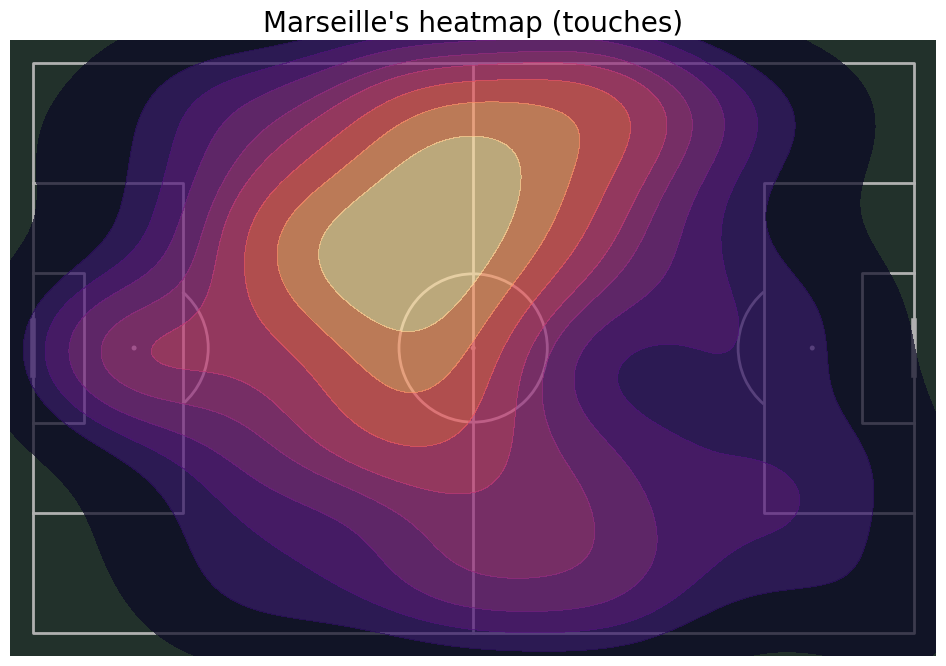

In [67]:
fig ,ax = plt.subplots(figsize=(13.5,8))

#this is how we create the pitch
pitch = Pitch(pitch_type='opta',pitch_color='#22312b')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)

#Create the heatmap
kde = sns.kdeplot(data=h_touches,
        x='x',
        y='y',
        fill = True,
        #shade_lowest=False,
        alpha=.7,
        n_levels=10,
        cmap='magma'
)

plt.title('Marseille\'s heatmap (touches)',size=20)

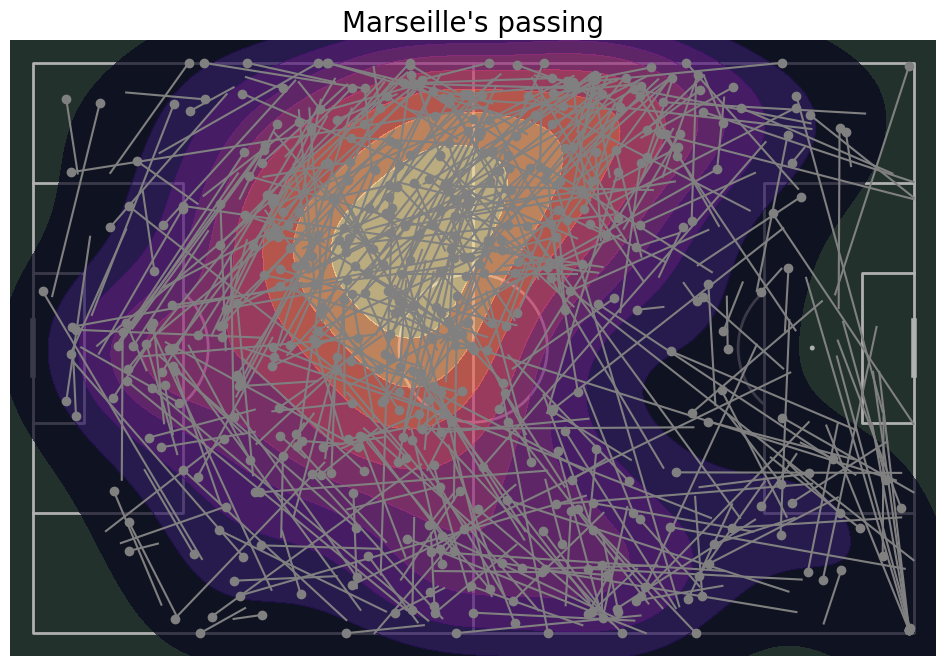

In [68]:
fig ,ax = plt.subplots(figsize=(13.5,8))

#this is how we create the pitch
pitch = Pitch(pitch_type='opta',pitch_color='#22312b')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(data=h_passes,
        x='x',
        y='y',
        fill = True,
        #shade_lowest=False,
        alpha=.7,
        n_levels=10,
        cmap='magma'
)

plt.title('Marseille\'s passing',size=20)

plt.plot((h_passes['x'],h_passes['endX']),(h_passes['y'],h_passes['endY']),color='grey')
plt.scatter(h_passes['x'],h_passes['y'],color='grey')

#use a for loop to plot each pass
#for x in range(len(h_passes['x'])):
#    if h_passes['outcomeType_displayName'][x] == 'Successful':
#        plt.plot((h_passes['x'][x],h_passes['endX'][x]),(h_passes['y'][x],h_passes['endY'][x]),color='green')
#        plt.scatter(h_passes['x'][x],h_passes['y'][x],color='green')
#    if h_passes['outcomeType_displayName'][x] == 'Unsuccessful':
#        plt.plot((h_passes['x'][x],h_passes['endX'][x]),(h_passes['y'][x],h_passes['endY'][x]),color='red')
#        plt.scatter(h_passes['x'][x],h_passes['y'][x],color='red')

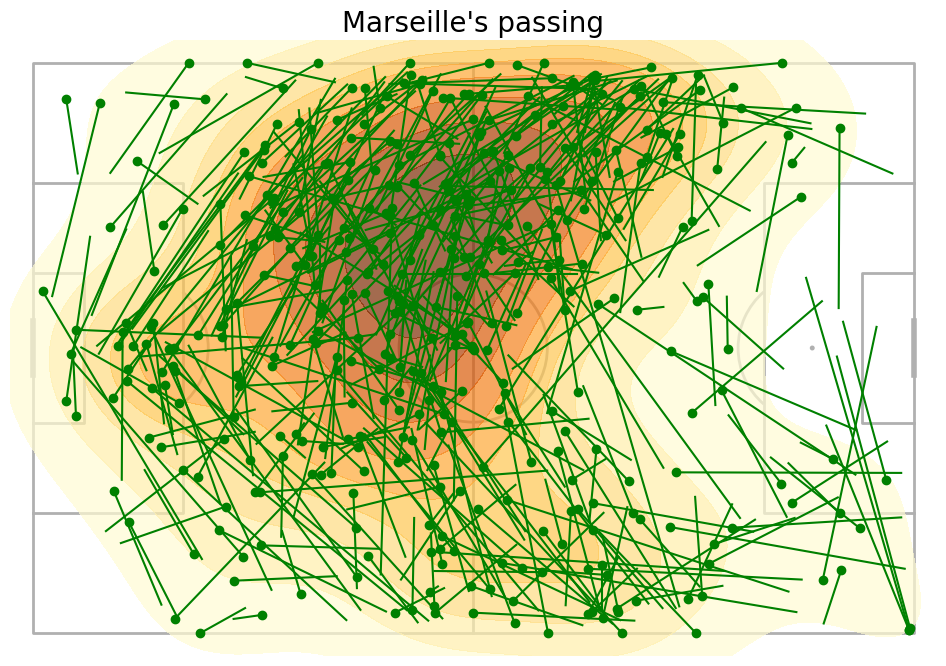

In [69]:
fig ,ax = plt.subplots(figsize=(13.5,8))

#this is how we create the pitch
pitch = Pitch(pitch_type='opta')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

data = h_passes[h_passes["outcomeType_displayName"]=="Successful"]
#Create the heatmap
kde = sns.kdeplot(data,
        x='x',
        y='y',
        fill = True,
        #shade_lowest=False,
        alpha=.7,
        n_levels=10,
        cmap='YlOrBr'
)

plt.title('Marseille\'s passing',size=20)

plt.plot((data['x'],data['endX']),(data['y'],data['endY']),color='green')
plt.scatter(data['x'],data['y'],color='green')

#use a for loop to plot each pass
#for x in range(len(h_passes['x'])):
#    if h_passes['outcomeType_displayName'][x] == 'Successful':
#        plt.plot((h_passes['x'][x],h_passes['endX'][x]),(h_passes['y'][x],h_passes['endY'][x]),color='green')
#        plt.scatter(h_passes['x'][x],h_passes['y'][x],color='green')
#    if h_passes['outcomeType_displayName'][x] == 'Unsuccessful':
#        plt.plot((h_passes['x'][x],h_passes['endX'][x]),(h_passes['y'][x],h_passes['endY'][x]),color='red')
#        plt.scatter(h_passes['x'][x],h_passes['y'][x],color='red')

In [70]:
h_actions = pd.concat([h_passes,home_shots,h_touches,h_defensive_actions])

Text(0.5, 1.0, "Marseille's heatmap")

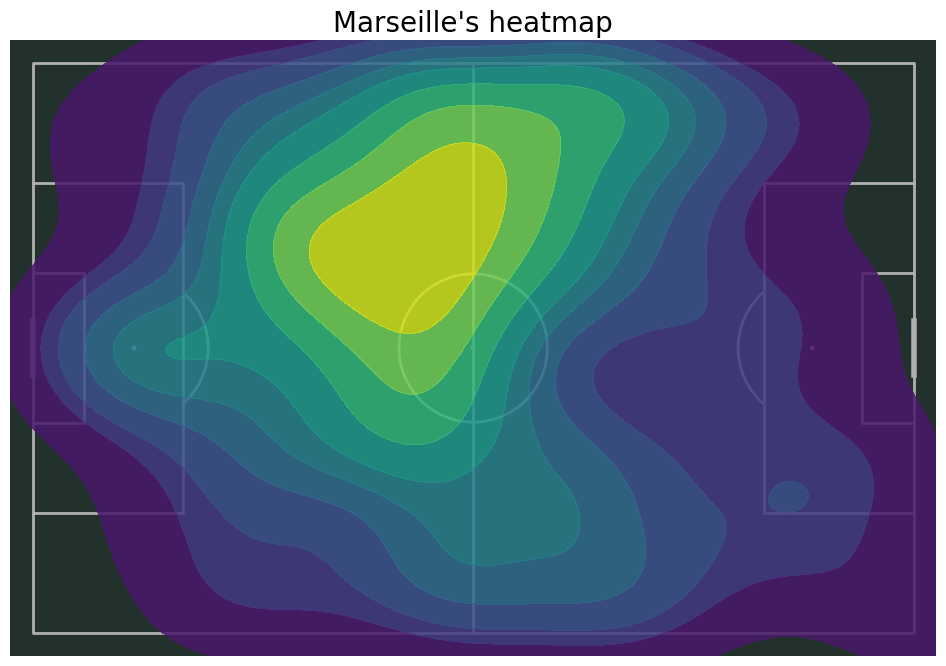

In [71]:
fig ,ax = plt.subplots(figsize=(13.5,8))

#this is how we create the pitch
pitch = Pitch(pitch_type='opta',pitch_color='#22312b')

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
#plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(data=h_actions,
        x='x',
        y='y',
        fill = True,
        #shade_lowest=False,
        alpha=.85,
        n_levels=10,
        cmap='viridis'
)

plt.title('Marseille\'s heatmap',size=20)

***

# FBref

In [72]:
url = 'https://fbref.com/en/matches/b26778b7/Girona-Alaves-December-18-2023-La-Liga'
page = requests.get(url)
page

<Response [200]>

In [73]:
soup = BeautifulSoup(page.text,'lxml')

In [74]:
scorebox = soup.find('div',{'class':"scorebox"})

In [75]:
scorebox.find_all('div',{'class':'media-item logo loader'})

[<div class="media-item logo loader">
 <img alt="Girona Club Crest" class="teamlogo" src="https://cdn.ssref.net/req/202312151/tlogo/fb/9024a00a.png"/>
 </div>,
 <div class="media-item logo loader">
 <img alt="Alavés Club Crest" class="teamlogo" src="https://cdn.ssref.net/req/202312151/tlogo/fb/8d6fd021.png"/>
 </div>]

In [76]:
#extracting the team logos/crests
images = scorebox.find_all('img')
imageSources = []
 
for image in images:
    imageSources.append(image.get('src'))
imageSources
#to download them:
#for image in imageSources:
    #webs = requests.get(image)
    #open('images/' + image.split('/')[-1], 'wb').write(webs.content)

['https://cdn.ssref.net/req/202312151/tlogo/fb/9024a00a.png',
 'https://cdn.ssref.net/req/202312151/tlogo/fb/8d6fd021.png']

In [77]:
#links to previous matches for each team
scorebox.find_all('div',{'class':'prevnext'})

[<div class="prevnext">
 <a class="button2 prev" href="/en/matches/36e35f1b/Barcelona-Girona-December-10-2023-La-Liga">Prev Match</a>
 <a class="button2 next" href="/en/matches/ce152000/Real-Betis-Girona-December-21-2023-La-Liga">Next Match</a>
 </div>,
 <div class="prevnext">
 <a class="button2 prev" href="/en/matches/06bb7e90/Alaves-Las-Palmas-December-9-2023-La-Liga">Prev Match</a>
 <a class="button2 next" href="/en/matches/4dec0026/Alaves-Real-Madrid-December-21-2023-La-Liga">Next Match</a>
 </div>]

In [78]:
#events
scorebox.find_all('div',{'class':'event'})

[<div class="event" id="a">
 <div><a href="/en/players/5b847bb0/Artem-Dovbyk">Artem Dovbyk</a> · 23&amp;rsquor; <div class="event_icon goal"></div></div>
 <div><a href="/en/players/1bda5842/Portu">Portu</a> · 42&amp;rsquor; <div class="event_icon goal"></div></div>
 <div><a href="/en/players/5b847bb0/Artem-Dovbyk">Artem Dovbyk</a> (P) · 59&amp;rsquor; <div class="event_icon penalty_goal"></div></div>
 </div>,
 <div class="event" id="b">
 </div>]

In [79]:
#home team's score
scorebox.find_all('div',{'class':'score'})[0].string

'3'

In [80]:
#away team's score
scorebox.find_all('div',{'class':'score'})[1].string

'0'

In [81]:
#home team's xG
scorebox.find_all('div',{'class':'score_xg'})[0].string

'1.7'

In [82]:
#away team's xG
scorebox.find_all('div',{'class':'score_xg'})[1].string

'0.7'

In [83]:
#Team's managers and captains
#scorebox.find_all('div',{'class':'datapoint'})
#Girona's manager
#scorebox.find_all('div',{'class':'datapoint'})[0].text
#Girona's captain
#scorebox.find_all('div',{'class':'datapoint'})[1].text
#Alavés' manager
#scorebox.find_all('div',{'class':'datapoint'})[2].text
#Alavés' captain
scorebox.find_all('div',{'class':'datapoint'})[3].text

'Captain: Rubén\xa0Duarte'

In [84]:
#general info: date and time, league/competition, matchweek/round, attendance, venue, and officials
scorebox.find_all('div',{'class':'scorebox_meta'})[0].text

'\nMonday December 18, 2023, 21:00 (venue time) La Liga (Matchweek 17)Girona vs. Alavés Historical Head-to-Head\xa0Attendance: 11,812Venue: Estadi Municipal de Montilivi, GironaOfficials: Francisco\xa0Hernández (Referee)\xa0· Iván\xa0Masso\xa0Granado (AR1)\xa0· Abraham\xa0Pérez (AR2)\xa0· Francisco\xa0Ortega (4th)\xa0· Carlos\xa0del\xa0Cerro (VAR)\n'

In [85]:
#list of players (both starters and bench)
soup.find_all('div',{'id':"field"})

[<div id="field">
 <img alt="football pitch for squad formations" src="https://cdn.ssref.net/req/1/images/fb/pitch.svg"/>
 <div class="poptip b" style="top: calc(50% - 18px); right: calc(5% - 8px);" tip="&lt;img style='height:100px;width:100px;' src='https://fbref.com/req/202302030/images/headshots/9970da54_2022.jpg'&gt;&lt;br&gt;&lt;strong&gt;Antonio Sivera&lt;/strong&gt;" title="Antonio Sivera">1</div>
 <div class="poptip b" style="top: calc(16.6666666666667% - 18px); right: calc(30% - 8px);" tip="&lt;img style='height:100px;width:100px;' src='https://fbref.com/req/202302030/images/headshots/6f5f82c0_2022.jpg'&gt;&lt;br&gt;&lt;strong&gt;Andoni Gorosabel&lt;/strong&gt;" title="Andoni Gorosabel">2</div>
 <div class="poptip b" style="top: calc(66.6666666666667% - 18px); right: calc(15% - 8px);" tip="&lt;img style='height:100px;width:100px;' src='https://fbref.com/req/202302030/images/headshots/1fe0492d_2022.jpg'&gt;&lt;br&gt;&lt;strong&gt;Rubén Duarte&lt;/strong&gt;" title="Rubén Duarte

In [86]:
#formation, starting lineup and bench
soup.find_all('div',{'class':"lineup"})
#for Girona: soup.find_all('div',{'class':"lineup"})[0].text.strip()
#for Alavés: soup.find_all('div',{'class':"lineup"})[1].text.strip()

[<div class="lineup" id="a">
 <table>
 <tr><th colspan="2">Girona (3-4-3)</th></tr>
 <tr><td>13</td><td><a href="/en/players/63d17038/Paulo-Gazzaniga">Paulo Gazzaniga</a></td></tr><tr><td>3</td><td><a href="/en/players/7e98cff1/Miguel-Gutierrez">Miguel Gutiérrez</a></td></tr><tr><td>5</td><td><a href="/en/players/f03f284b/David-Lopez">David López</a><div class="event_icon substitute_in"></div></td></tr><tr><td>9</td><td><a href="/en/players/5b847bb0/Artem-Dovbyk">Artem Dovbyk</a><div class="event_icon goal"></div><div class="event_icon goal"></div></td></tr><tr><td>14</td><td><a href="/en/players/a10361d2/Aleix-Garcia">Aleix García</a></td></tr><tr><td>16</td><td><a href="/en/players/fe6e7156/Savio">Sávio</a><div class="event_icon substitute_in"></div></td></tr><tr><td>17</td><td><a href="/en/players/691bef82/Daley-Blind">Daley Blind</a></td></tr><tr><td>20</td><td><a href="/en/players/1944818c/Yan-Couto">Yan Couto</a><div class="event_icon substitute_in"></div></td></tr><tr><td>23</td

In [87]:
soup.find_all('div',{'class':"lineup"})[0].text.strip()

'Girona (3-4-3)\n13Paulo Gazzaniga3Miguel Gutiérrez5David López9Artem Dovbyk14Aleix García16Sávio17Daley Blind20Yan Couto23Iván Martín24Portu25Eric García\nBench\n1Juan Carlos26Toni Fuidias2Bernardo Espinosa4Arnau Martinez6Ibrahima Kebe11Valery Fernández15Juanpe18Pablo Torre22Jhon Solis'

In [88]:
#soup.find('div',{'id':"events_wrap"})

In [89]:
#match summary/events

In [90]:
#I used ChatGPT for figuring this out
import html
# Find all event elements using regex to match class names starting with 'event'
events = soup.find_all('div', class_=re.compile(r'^event\s'))

# Initialize lists to hold event data
times = []
scores = []
players = []
event_types = []

# Extract data for each event
for event in events:
    # Extract time and score
    time_score_div = event.find('div')
    if time_score_div:
        # Using html.unescape to decode HTML entities
        time_score_text = html.unescape(time_score_div.get_text(strip=True))
        # Splitting and cleaning the time and score data
        time = time_score_text.split('’')[0] + '’' if '’' in time_score_text else time_score_text
        score = time_score_text.split('’')[1] if '’' in time_score_text else ''
        times.append(time)
        scores.append(score)

    # Extract player name
    player = event.find('a').get_text(strip=True) if event.find('a') else ''
    players.append(player)
    
    # Extract event type (goal, card, etc.)
    event_type = 'Unknown'  # Default value
    for div in event.find_all('div'):
        if '—' in div.get_text():
            event_type = div.get_text(strip=True).split('—')[-1].strip()
            break
    event_types.append(event_type)

# Create a DataFrame
df = pd.DataFrame({
    'Time': times,
    'Score': scores,
    'Player': players,
    'Event Type': event_types
})
df

,Time,Score,Player,Event Type
0,23’,1:0,Artem Dovbyk,Goal 1:0
1,39’,1:0,Nahuel Tenaglia,Yellow Card
2,42’,2:0,Portu,Goal 2:0
3,59’,3:0,Artem Dovbyk,Goal
4,61’,3:0,Ianis Hagi,Substitute
5,61’,3:0,Abderrahman Rebbach,Substitute
6,64’,3:0,Valery Fernández,Substitute
7,64’,3:0,Pablo Torre,Substitute
8,73’,3:0,Jhon Solis,Substitute
9,73’,3:0,Kiké,Substitute


In [91]:
team_stats = soup.find('div',{'id':"team_stats"})

In [92]:
#possession - Girona (home team)
team_stats.find_all('td')[0].text.replace('\n','')

'66%'

In [93]:
#possession - Alavés (away team)
team_stats.find_all('td')[1].text.replace('\n','')

'34%'

In [94]:
#passing accuracy - Girona (home team)
team_stats.find_all('td')[2].text.replace('\n','').replace('\xa0—\xa0',' ; ')

'656 of 738 ; 89%'

In [95]:
#passing accuracy - Alavés (away team)
team_stats.find_all('td')[3].text.replace('\n','').replace('\xa0—\xa0',' ; ')

'82% ; 307 of 376'

In [96]:
#shots on target - Girona (home team)
team_stats.find_all('td')[4].text.replace('\n','').replace('\xa0—\xa0',' ; ')

'3 of 8 ; 38%'

In [97]:
#shots on target - Alavés (away team)
team_stats.find_all('td')[5].text.replace('\n','').replace('\xa0—\xa0',' ; ')

'17% ; 2 of 12'

In [98]:
#saves - Girona (home team)
team_stats.find_all('td')[6].text.replace('\n','').replace('\xa0—\xa0',' ; ')

'2 of 2 ; 100%'

In [99]:
#saves - Alavés (away team)
team_stats.find_all('td')[7].text.replace('\n','').replace('\xa0—\xa0',' ; ')

'33% ; 1 of 3'

In [100]:
#yellow cards - Girona (home team)
team_stats.find_all('td')[8].text.replace('\n','')

''

In [101]:
#yellow cards - Alavés (away team)
team_stats.find_all('td')[9].text.replace('\n','')

''

In [102]:
soup.find('div',{'id':"team_stats_extra"})

<div id="team_stats_extra">
<div>
<div class="th">Girona</div><div class="th"> </div><div class="th">Alavés</div>
<div>9</div><div>Fouls</div><div>7</div>
<div>3</div><div>Corners</div><div>2</div>
<div>13</div><div>Crosses</div><div>17</div>
<div>829</div><div>Touches</div><div>472</div>
</div>
<div>
<div class="th">Girona</div><div class="th"> </div><div class="th">Alavés</div>
<div>10</div><div>Tackles</div><div>18</div>
<div>3</div><div>Interceptions</div><div>9</div>
<div>7</div><div>Aerials Won</div><div>8</div>
<div>14</div><div>Clearances</div><div>21</div>
</div>
<div>
<div class="th">Girona</div><div class="th"> </div><div class="th">Alavés</div>
<div>3</div><div>Offsides</div><div>1</div>
<div>10</div><div>Goal Kicks</div><div>6</div>
<div>18</div><div>Throw Ins</div><div>17</div>
<div>52</div><div>Long Balls</div><div>52</div>
</div>
</div>

In [103]:
stats_container = soup.find('div',{'id':"team_stats_extra"})
stat_names = []
girona_stats = []
alaves_stats = []

# Extract data from each group of div elements
for stat_group in stats_container.find_all('div'):
    divs = stat_group.find_all('div')
    for i in range(1, len(divs), 3):
        stat_names.append(divs[i].get_text(strip=True))
        girona_stats.append(divs[i-1].get_text(strip=True))
        alaves_stats.append(divs[i+1].get_text(strip=True))

# Create a DataFrame
df = pd.DataFrame({
    'Statistic': stat_names,
    'Girona': girona_stats,
    'Alavés': alaves_stats
})
# Remove rows where 'Girona' and Alavcolumn is 'Girona' or 'Alavés'
df = df[~df['Girona'].isin(['Girona', 'Alavés'])]
df = df[~df['Alavés'].isin(['Girona', 'Alavés'])]

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)
df

,Statistic,Girona,Alavés
0,Fouls,9,7
1,Corners,3,2
2,Crosses,13,17
3,Touches,829,472
4,Tackles,10,18
5,Interceptions,3,9
6,Aerials Won,7,8
7,Clearances,14,21
8,Offsides,3,1
9,Goal Kicks,10,6


In [104]:
table = soup.find_all('table')

In [105]:
#Girona lineup, formation and bench
#table[0].find_all('tr')
# Extract player rows
player_rows = table[0].find_all('tr')

# Initialize list for player names and DataFrame data
player_names = []
df_data = []

# Extract data for each player
for row in player_rows:
    player_link = row.find('a')
    if player_link:  # Ensure the player link is found
        player_name = player_link.get_text(strip=True)
        player_names.append(player_name)

        # Check for goal scorer and substitute
        goal_scorer = 'Yes' if row.find('div', class_='event_icon goal') else 'No'
        substitute = 'Yes' if row.find('div', class_='event_icon substitute_in') else 'No'

        df_data.append([player_name, goal_scorer, substitute])
# Create the DataFrame
Girona_players = pd.DataFrame(df_data, columns=['Player Name', 'Goal Scored', 'Substitute'])

In [106]:
player_names

['Paulo Gazzaniga',
 'Miguel Gutiérrez',
 'David López',
 'Artem Dovbyk',
 'Aleix García',
 'Sávio',
 'Daley Blind',
 'Yan Couto',
 'Iván Martín',
 'Portu',
 'Eric García',
 'Juan Carlos',
 'Toni Fuidias',
 'Bernardo Espinosa',
 'Arnau Martinez',
 'Ibrahima Kebe',
 'Valery Fernández',
 'Juanpe',
 'Pablo Torre',
 'Jhon Solis']

In [107]:
Girona_players

,Player Name,Goal Scored,Substitute
0,Paulo Gazzaniga,No,No
1,Miguel Gutiérrez,No,No
2,David López,No,Yes
3,Artem Dovbyk,Yes,No
4,Aleix García,No,No
5,Sávio,No,Yes
6,Daley Blind,No,No
7,Yan Couto,No,Yes
8,Iván Martín,No,Yes
9,Portu,Yes,Yes


In [108]:
#Alavés lineup, formation and bench
#same as above, but starting from table[1]
a_player_rows = table[1].find_all('tr')
a_player_names = []
a_data = []
for row in a_player_rows:
    a_player_link = row.find('a')
    if a_player_link:  # Ensure the player link is found
        a_player_name = a_player_link.get_text(strip=True)
        a_player_names.append(a_player_name)

        # Check for goal scorer and substitute
        goal_scorer = 'Yes' if row.find('div', class_='event_icon goal') else 'No'
        substitute = 'Yes' if row.find('div', class_='event_icon substitute_in') else 'No'

        a_data.append([a_player_name, goal_scorer, substitute])
# Create the DataFrame
a_players = pd.DataFrame(a_data, columns=['Player Name', 'Goal Scored', 'Substitute'])
a_players

,Player Name,Goal Scored,Substitute
0,Antonio Sivera,No,No
1,Andoni Gorosabel,No,Yes
2,Rubén Duarte,No,No
3,Ander Guevara,No,No
4,Antonio Blanco,No,Yes
5,Luis Rioja,No,Yes
6,Nahuel Tenaglia,No,No
7,Rafa Marín,No,No
8,Jon Guridi,No,Yes
9,Javi López,No,No


In [109]:
#general statistics 

# Extract all tr elements
tr_elements = table[2].find_all('tr')

# Initialize lists to hold data
stat_names = []
girona_stats = []
alaves_stats = []

# Extract team names (assuming first row contains team names)
team_names = [team.get_text(strip=True) for team in tr_elements[0].find_all('span', class_='teamandlogo')]
girona, alaves = team_names

# Extract statistics
for i in range(1, len(tr_elements), 2):
    stat_name = tr_elements[i].get_text(strip=True)  # Statistic name
    girona_stat, alaves_stat = [stat_div.get_text(strip=True) for stat_div in tr_elements[i+1].find_all('td')]
    
    stat_names.append(stat_name)
    girona_stats.append(girona_stat)
    alaves_stats.append(alaves_stat)

# Create the DataFrame
match_stats = pd.DataFrame({
    'Statistic': stat_names,
    girona: girona_stats,
    alaves: alaves_stats
})

match_stats

,Statistic,Girona,Alavés
0,Possession,66%,34%
1,Passing Accuracy,656 of 738 —89%,82%— 307 of 376
2,Shots on Target,3 of 8 —38%,17%— 2 of 12
3,Saves,2 of 2 —100%,33%— 1 of 3
4,Cards,,


In [110]:
#Girona Player Stats Table: Summary
Girona_summStats = table[3]
# Extract column headers
headers = [th.get_text(strip=True) for th in Girona_summStats.find_all('th') if th.get("scope") == "col"]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in Girona_summStats.find_all('tr')[1:]:  # Skip the header row
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
Girona_summary_stats = pd.DataFrame(rows_data, columns=headers)
# Remove the first row (which was the same as the headers/column names)
Girona_summary_stats = Girona_summary_stats.drop(df.index[0])
# same but using slicing:
#Girona_summary_stats = Girona_summary_stats[1:].reset_index(drop=True)

Girona_summary_stats

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,Att,Succ
1,Artem Dovbyk,9,uaUKR,FW,26-180,90,2,0,1,1,...,1,0,12,18,66.7,1,11,0,1,0
2,Sávio,16,brBRA,AM,19-252,63,0,0,0,0,...,0,0,19,26,73.1,0,18,5,5,3
3,Valery Fernández,11,esESP,DM,24-025,27,0,0,0,0,...,1,0,9,10,90.0,0,14,1,3,0
4,Portu,24,esESP,AM,31-211,63,1,0,0,0,...,3,1,17,19,89.5,2,17,4,2,0
5,Pablo Torre,18,esESP,FW,20-259,27,0,0,0,0,...,0,0,28,31,90.3,1,23,1,0,0
6,Aleix García,14,esESP,"CM,DM",26-173,90,0,0,0,0,...,0,0,104,117,88.9,9,75,1,0,0
7,Iván Martín,23,esESP,"CM,DM",24-307,72,0,0,0,0,...,0,0,57,60,95.0,7,48,2,0,0
8,Jhon Solis,22,coCOL,DM,19-076,18,0,0,0,0,...,1,0,10,11,90.9,1,10,1,2,1
9,Miguel Gutiérrez,3,esESP,WB,22-144,90,0,0,0,0,...,2,0,61,69,88.4,2,40,2,2,0
10,Yan Couto,20,brBRA,WB,21-198,78,0,1,0,0,...,6,4,30,39,76.9,0,29,5,4,3


In [111]:
#Girona Player Stats Table: Passing
girona_passing = table[4]
# Extract column headers
headers = [th.get_text(strip=True) for th in girona_passing.find_all('th') if th.get("scope") == "col"]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in girona_passing.find_all('tr')[1:]:  # Skip the header row
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
Girona_passing = pd.DataFrame(rows_data, columns=headers)
# Remove the first row (which was the same as the headers/column names)
Girona_passing = Girona_passing.drop(df.index[0])
# same but using slicing:
#Girona_summary_stats = Girona_summary_stats[1:].reset_index(drop=True)

Girona_passing

,Player,#,Nation,Pos,Age,Min,Cmp,Att,Cmp%,TotDist,...,Att,Cmp%,Ast,xAG,xA,KP,1/3,PPA,CrsPA,PrgP
1,Artem Dovbyk,9,uaUKR,FW,26-180,90,12,18,66.7,96,...,0,,0,0.0,0.1,0,0,1,0,1
2,Sávio,16,brBRA,AM,19-252,63,19,26,73.1,239,...,1,0.0,0,0.0,0.0,0,0,0,0,0
3,Valery Fernández,11,esESP,DM,24-025,27,9,10,90.0,93,...,0,,0,0.0,0.0,0,0,0,0,0
4,Portu,24,esESP,AM,31-211,63,17,19,89.5,195,...,1,100.0,0,0.0,0.0,0,0,0,0,2
5,Pablo Torre,18,esESP,FW,20-259,27,28,31,90.3,399,...,4,75.0,0,0.0,0.0,0,2,1,0,1
6,Aleix García,14,esESP,"CM,DM",26-173,90,104,117,88.9,1833,...,17,76.5,0,0.0,0.0,1,10,0,0,9
7,Iván Martín,23,esESP,"CM,DM",24-307,72,57,60,95.0,851,...,4,100.0,0,0.0,0.1,0,3,2,0,7
8,Jhon Solis,22,coCOL,DM,19-076,18,10,11,90.9,139,...,1,100.0,0,0.0,0.0,1,1,0,0,1
9,Miguel Gutiérrez,3,esESP,WB,22-144,90,61,69,88.4,938,...,2,50.0,0,0.2,0.2,2,1,3,1,2
10,Yan Couto,20,brBRA,WB,21-198,78,30,39,76.9,414,...,3,66.7,1,0.2,0.4,2,0,1,1,0


In [112]:
#Girona Player Stats Table: Passing Types
girona_passing_types = table[5]
# Extract column headers
headers = [th.get_text(strip=True) for th in girona_passing_types.find_all('th') if th.get("scope") == "col"]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in girona_passing_types.find_all('tr')[1:]:  # Skip the header row
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
Girona_passing_types = pd.DataFrame(rows_data, columns=headers)
# Remove the first row (which was the same as the headers/column names)
Girona_passing_types = Girona_passing_types.drop(df.index[0])
Girona_passing_types

,Player,#,Nation,Pos,Age,Min,Att,Live,Dead,FK,...,Sw,Crs,TI,CK,In,Out,Str,Cmp,Off,Blocks
1,Artem Dovbyk,9,uaUKR,FW,26-180,90,18,17,1,0,...,0,0,0,0,0,0,0,12,0,1
2,Sávio,16,brBRA,AM,19-252,63,26,26,0,0,...,0,2,0,0,0,0,0,19,0,2
3,Valery Fernández,11,esESP,DM,24-025,27,10,10,0,0,...,0,0,0,0,0,0,0,9,0,1
4,Portu,24,esESP,AM,31-211,63,19,19,0,0,...,0,0,0,0,0,0,0,17,0,1
5,Pablo Torre,18,esESP,FW,20-259,27,31,31,0,0,...,0,0,0,0,0,0,0,28,0,0
6,Aleix García,14,esESP,"CM,DM",26-173,90,117,113,4,1,...,5,4,0,3,0,2,0,104,0,0
7,Iván Martín,23,esESP,"CM,DM",24-307,72,60,59,0,0,...,0,0,0,0,0,0,0,57,1,0
8,Jhon Solis,22,coCOL,DM,19-076,18,11,11,0,0,...,0,0,0,0,0,0,0,10,0,0
9,Miguel Gutiérrez,3,esESP,WB,22-144,90,69,60,9,1,...,0,3,8,0,0,0,0,61,0,1
10,Yan Couto,20,brBRA,WB,21-198,78,39,38,1,0,...,0,4,1,0,0,0,0,30,0,3


In [113]:
#Girona Player Stats Table: Defense
girona_defense = table[6]
# Extract column headers
headers = [th.get_text(strip=True) for th in girona_defense.find_all('th') if th.get("scope") == "col"]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in girona_defense.find_all('tr')[1:]:  # Skip the header row
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
Girona_defense = pd.DataFrame(rows_data, columns=headers)
# Remove the first row (which was the same as the headers/column names)
Girona_defense = Girona_defense.drop(df.index[0])
Girona_defense

,Player,#,Nation,Pos,Age,Min,Tkl,TklW,Def 3rd,Mid 3rd,...,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
1,Artem Dovbyk,9,uaUKR,FW,26-180,90,1,1,1,0,...,0,,0,0,0,0,0,1,0,0
2,Sávio,16,brBRA,AM,19-252,63,0,0,0,0,...,1,0.0,1,0,0,0,0,0,1,0
3,Valery Fernández,11,esESP,DM,24-025,27,2,1,0,2,...,2,50.0,1,1,0,1,0,2,0,0
4,Portu,24,esESP,AM,31-211,63,0,0,0,0,...,1,0.0,1,0,0,0,0,0,0,0
5,Pablo Torre,18,esESP,FW,20-259,27,1,0,0,1,...,2,50.0,1,1,0,1,0,1,0,0
6,Aleix García,14,esESP,"CM,DM",26-173,90,0,0,0,0,...,0,,0,0,0,0,1,1,0,0
7,Iván Martín,23,esESP,"CM,DM",24-307,72,0,0,0,0,...,0,,0,1,0,1,0,0,0,0
8,Jhon Solis,22,coCOL,DM,19-076,18,0,0,0,0,...,1,0.0,1,0,0,0,0,0,0,0
9,Miguel Gutiérrez,3,esESP,WB,22-144,90,0,0,0,0,...,0,,0,0,0,0,0,0,2,0
10,Yan Couto,20,brBRA,WB,21-198,78,0,0,0,0,...,1,0.0,1,0,0,0,0,0,0,0


In [114]:
#Girona Player Stats Table: Possession
girona_possession = table[7]
# Extract column headers
headers = [th.get_text(strip=True) for th in girona_possession.find_all('th') if th.get("scope") == "col"]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in girona_possession.find_all('tr')[1:]:  # Skip the header row
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
Girona_possession = pd.DataFrame(rows_data, columns=headers)
# Remove the first row (which was the same as the headers/column names)
Girona_possession = Girona_possession.drop(df.index[0])
Girona_possession

,Player,#,Nation,Pos,Age,Min,Touches,Def Pen,Def 3rd,Mid 3rd,...,Carries,TotDist,PrgDist,PrgC,1/3,CPA,Mis,Dis,Rec,PrgR
1,Artem Dovbyk,9,uaUKR,FW,26-180,90,25,1,3,5,...,11,42,9,0,0,0,0,0,18,2
2,Sávio,16,brBRA,AM,19-252,63,32,0,1,8,...,18,139,94,5,3,0,2,0,27,11
3,Valery Fernández,11,esESP,DM,24-025,27,18,0,4,7,...,14,57,28,1,1,1,0,2,13,2
4,Portu,24,esESP,AM,31-211,63,24,0,0,11,...,17,161,86,4,5,0,2,0,22,6
5,Pablo Torre,18,esESP,FW,20-259,27,37,1,10,17,...,23,109,50,1,1,0,1,0,30,1
6,Aleix García,14,esESP,"CM,DM",26-173,90,123,5,33,65,...,75,445,213,1,3,0,1,1,103,1
7,Iván Martín,23,esESP,"CM,DM",24-307,72,67,1,11,30,...,48,283,134,2,3,0,1,0,57,1
8,Jhon Solis,22,coCOL,DM,19-076,18,15,0,4,8,...,10,83,56,1,0,0,1,2,10,0
9,Miguel Gutiérrez,3,esESP,WB,22-144,90,77,5,17,27,...,40,189,57,2,1,1,0,2,54,5
10,Yan Couto,20,brBRA,WB,21-198,78,44,0,2,10,...,29,295,181,5,2,2,2,0,33,9


In [115]:
#Girona Player Stats Table: Misc
girona_misc = table[8]
# Extract column headers
headers = [th.get_text(strip=True) for th in girona_misc.find_all('th') if th.get("scope") == "col"]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in girona_misc.find_all('tr')[1:]:  # Skip the header row
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
Girona_misc = pd.DataFrame(rows_data, columns=headers)
# Remove the first row (which was the same as the headers/column names)
Girona_misc = Girona_misc.drop(df.index[0])
Girona_misc

,Player,#,Nation,Pos,Age,Min,CrdY,CrdR,2CrdY,Fls,...,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%
1,Artem Dovbyk,9,uaUKR,FW,26-180,90,0,0,0,1,...,0,0,1,0,0,0,1,2,2,50.0
2,Sávio,16,brBRA,AM,19-252,63,0,0,0,2,...,2,0,0,0,0,0,0,0,0,
3,Valery Fernández,11,esESP,DM,24-025,27,0,0,0,0,...,0,0,1,0,0,0,2,0,0,
4,Portu,24,esESP,AM,31-211,63,0,0,0,2,...,0,0,0,0,0,0,1,0,0,
5,Pablo Torre,18,esESP,FW,20-259,27,0,0,0,0,...,0,0,0,0,0,0,3,0,1,0.0
6,Aleix García,14,esESP,"CM,DM",26-173,90,0,0,0,2,...,4,1,0,0,0,0,7,0,0,
7,Iván Martín,23,esESP,"CM,DM",24-307,72,0,0,0,1,...,0,0,0,0,0,0,3,0,0,
8,Jhon Solis,22,coCOL,DM,19-076,18,0,0,0,0,...,0,0,0,0,0,0,2,0,0,
9,Miguel Gutiérrez,3,esESP,WB,22-144,90,0,0,0,0,...,3,0,0,0,0,0,6,0,1,0.0
10,Yan Couto,20,brBRA,WB,21-198,78,0,0,0,0,...,4,0,0,1,0,0,2,0,0,


In [116]:
#Girona Goalkeeper Stats Table
girona_gk = table[9]
# Extract column headers
headers = [th.get_text(strip=True) for th in girona_gk.find_all('th') if th.get("scope") == "col"]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in girona_gk.find_all('tr')[1:]:  # Skip the header row
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
Girona_gk = pd.DataFrame(rows_data, columns=headers)
# Remove the first row (which was the same as the headers/column names)
Girona_gk = Girona_gk.drop(df.index[0])
Girona_gk

,Player,Nation,Age,Min,SoTA,GA,Saves,Save%,PSxG,Cmp,...,Launch%,AvgLen,Att,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,AvgDist
1,Paulo Gazzaniga,arARG,31-350,90,2,0,2,100.0,0.5,2,...,13.2,23.0,7,42.9,37.7,12,1,8.3,1,18.0


In [117]:
#Alavés Stats Table
#table[10] -> summary
#table[11] -> passing
#table[12] -> passing types
#table[13] -> defense
#table[14] -> possession
#table[15] -> misc
#Alavés Goalkeeper Stats Table -> table[16]

In [118]:
#Shots table: Both squads
shots_table1 = table[17]

# Extract column headers
# The first row of headers contains merged columns, so we'll get headers from the second row
headers = [th.get_text(strip=True) for th in shots_table1.find_all('tr')[1].find_all('th')]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in shots_table1.find_all('tbody')[0].find_all('tr'):
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
df = pd.DataFrame(rows_data, columns=headers)
df

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player,Event,Player,Event
0,8,Artem Dovbyk,Girona,0.16,,Blocked,8,Head,,Yan Couto,Pass (Live),Portu,Pass (Live)
1,23,Yan Couto,Girona,0.03,0.08,Saved,16,Left Foot,Deflected,Yan Couto,Pass (Live),Artem Dovbyk,Pass (Live)
2,23,Artem Dovbyk,Girona,0.44,0.31,Goal,8,Head,,Yan Couto,Shot,,
3,30,Samuel Omorodion,Alavés,0.07,0.42,Saved,12,Head,,Ander Guevara,Pass (Live),Antonio Blanco,Pass (Live)
4,31,Iván Martín,Girona,0.01,,Blocked,30,Left Foot,Volley,Portu,Pass (Live),Paulo Gazzaniga,Pass (Live)
5,42,Portu,Girona,0.08,0.43,Goal,16,Right Foot,,Yan Couto,Pass (Live),Portu,Pass (Live)
6,,,,,,,,,,,,,
7,52,Rafa Marín,Alavés,0.09,,Off Target,6,Head,,Rubén Duarte,Pass (Dead),Antonio Blanco,Fouled
8,53,Luis Rioja,Alavés,0.03,,Off Target,31,Left Foot,,Ander Guevara,Pass (Live),Nahuel Tenaglia,Pass (Live)
9,57,Ander Guevara,Alavés,0.02,,Off Target,25,Right Foot,Volley,Jon Guridi,Pass (Live),Andoni Gorosabel,Pass (Live)


In [119]:
#Shots table: Girona
shots_table1 = table[18]

# Extract column headers
# The first row of headers contains merged columns, so we'll get headers from the second row
headers = [th.get_text(strip=True) for th in shots_table1.find_all('tr')[1].find_all('th')]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in shots_table1.find_all('tbody')[0].find_all('tr'):
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
df = pd.DataFrame(rows_data, columns=headers)
df

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player,Event,Player,Event
0,8,Artem Dovbyk,Girona,0.16,,Blocked,8,Head,,Yan Couto,Pass (Live),Portu,Pass (Live)
1,23,Yan Couto,Girona,0.03,0.08,Saved,16,Left Foot,Deflected,Yan Couto,Pass (Live),Artem Dovbyk,Pass (Live)
2,23,Artem Dovbyk,Girona,0.44,0.31,Goal,8,Head,,Yan Couto,Shot,,
3,31,Iván Martín,Girona,0.01,,Blocked,30,Left Foot,Volley,Portu,Pass (Live),Paulo Gazzaniga,Pass (Live)
4,42,Portu,Girona,0.08,0.43,Goal,16,Right Foot,,Yan Couto,Pass (Live),Portu,Pass (Live)
5,,,,,,,,,,,,,
6,59,Artem Dovbyk(pen),Girona,0.79,0.91,Goal,13,Left Foot,,Yan Couto,Fouled,Yan Couto,Take-On
7,63,Artem Dovbyk,Girona,0.05,,Off Target,11,Head,,Miguel Gutiérrez,Pass (Live),Daley Blind,Pass (Live)
8,73,Pablo Torre,Girona,0.11,,Off Target,11,Right Foot,,Miguel Gutiérrez,Pass (Live),Valery Fernández,Pass (Live)
9,77,Valery Fernández,Girona,0.04,,Off Target,17,Right Foot,,Jhon Solis,Pass (Live),Eric García,Pass (Live)


In [120]:
#Shots table: Alavés
shots_table1 = table[19]

# Extract column headers
# The first row of headers contains merged columns, so we'll get headers from the second row
headers = [th.get_text(strip=True) for th in shots_table1.find_all('tr')[1].find_all('th')]

# Initialize list to hold row data
rows_data = []

# Extract data from each row
for tr in shots_table1.find_all('tbody')[0].find_all('tr'):
    cols = tr.find_all(['th', 'td'])
    row_data = [col.get_text(strip=True) for col in cols]
    rows_data.append(row_data)

# Create the DataFrame
df = pd.DataFrame(rows_data, columns=headers)
df

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes,Player,Event,Player,Event
0,30,Samuel Omorodion,Alavés,0.07,0.42,Saved,12,Head,,Ander Guevara,Pass (Live),Antonio Blanco,Pass (Live)
1,,,,,,,,,,,,,
2,52,Rafa Marín,Alavés,0.09,,Off Target,6,Head,,Rubén Duarte,Pass (Dead),Antonio Blanco,Fouled
3,53,Luis Rioja,Alavés,0.03,,Off Target,31,Left Foot,,Ander Guevara,Pass (Live),Nahuel Tenaglia,Pass (Live)
4,57,Ander Guevara,Alavés,0.02,,Off Target,25,Right Foot,Volley,Jon Guridi,Pass (Live),Andoni Gorosabel,Pass (Live)
5,67,Ianis Hagi,Alavés,0.02,,Off Target,31,Left Foot,,Ander Guevara,Pass (Live),Javi López,Pass (Live)
6,75,Alex Sola,Alavés,0.11,,Off Target,15,Head,,Antonio Blanco,Pass (Live),Javi López,Pass (Live)
7,79,Abderrahman Rebbach,Alavés,0.16,,Off Target,15,Right Foot,,Javi López,Pass (Live),Antonio Sivera,Pass (Dead)
8,82,Abderrahman Rebbach,Alavés,0.03,0.10,Saved,20,Right Foot,Deflected,Antonio Sivera,Pass (Live),Rafa Marín,Pass (Live)
9,84,Javi López,Alavés,0.04,,Off Target,18,Right Foot,,Alex Sola,Pass (Live),Ianis Hagi,Pass (Live)
